## 이진 베이지안 모델

### 문제 (1) X, Y 데이터를 생성
* Sklearn의 make_classification() 함수: 분류에 쓰일 수 있는 데이터를 생성해 줌

In [1]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [2]:
X[:7]

array([[-0.92291891, -0.90749148],
       [ 1.52623688, -0.78475032],
       [ 2.33952333, -0.08891233],
       [-1.38529045,  1.04487197],
       [-0.51902892,  1.15870587],
       [-1.41499163,  1.0644773 ],
       [ 1.37371437, -0.72928826]])

In [3]:
Y[:7]

array([0, 1, 1, 0, 0, 0, 1])

### 문제 (2) X의 평균과 표준편차 계산해서 출력

In [4]:
X.mean(), X.std()

(-0.023297423768963203, 1.2329381377034283)

### 문제 (3) 그래프 작성
* scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.

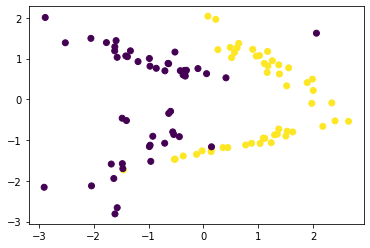

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], marker='o', c=Y)
plt.show()

### 문제 (4) 훈련데이터, 테스트데이터 3:1로 분리
* train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### 문제 (5) 훈련데이터에 대하여 BernoulliNB 모델링
* X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

In [7]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)

In [8]:
bnb.fit(X_train, Y_train)

BernoulliNB()

### 문제 (6) 테스트데이터에 대하여 예측값을 출력
* 예측이 맞는지 실제값 Y와 비교해보자.

In [9]:
list(zip(bnb.predict(X_test),Y_test, X_test))

[(1, 1, array([ 1.62749927, -0.80232816])),
 (1, 1, array([ 2.39899356, -0.53022634])),
 (1, 1, array([0.64251927, 1.37253157])),
 (1, 1, array([1.55354553, 0.77215014])),
 (1, 1, array([2.00180342, 0.21624073])),
 (0, 0, array([-0.34523403,  0.70843581])),
 (1, 1, array([1.25570218, 0.94586418])),
 (1, 1, array([0.89803923, 1.22446398])),
 (0, 0, array([-0.92291891, -0.90749148])),
 (1, 1, array([ 1.1195778 , -0.96066763])),
 (0, 0, array([-2.90293229, -2.15924041])),
 (0, 0, array([-0.97389248,  0.81200956])),
 (0, 0, array([-0.64505473,  0.88132086])),
 (1, 0, array([2.05986743, 1.62184793])),
 (1, 1, array([0.26341046, 1.21722835])),
 (0, 0, array([-1.46906465, -1.70149121])),
 (0, 0, array([-0.63262059, -0.3468889 ])),
 (0, 0, array([-1.61489843,  1.28964432])),
 (1, 1, array([ 2.17614489, -0.66409611])),
 (0, 0, array([-2.88375137,  2.00760716])),
 (0, 0, array([-0.43846564, -0.91742731])),
 (0, 1, array([-0.02473918, -1.2650691 ])),
 (0, 0, array([-1.63364933, -1.94381659])),
 (

In [10]:
# 이진값 넣어 예측값 출력
bnb.predict([[1,1], [1,-1], [-1,1], [-1,-1], [0,0]])

array([1, 1, 0, 0, 0])

### 문제 (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

In [11]:
bnb.score(X_test, Y_test)

0.88